Stock Market Predictor

In [1]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import os
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

Data Set

In [2]:
sp500_df = yf.download("^GSPC", start="2010-01-01")
sp500_df.to_csv("sp500.csv")

[*********************100%%**********************]  1 of 1 completed


In [3]:
sp500_df.index = pd.to_datetime(sp500_df.index, utc=True)

In [4]:
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00+00:00,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05 00:00:00+00:00,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06 00:00:00+00:00,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07 00:00:00+00:00,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08 00:00:00+00:00,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


<Axes: xlabel='Date'>

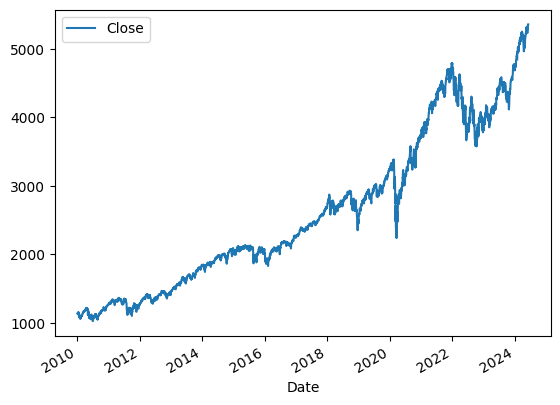

In [4]:
sp500_df.plot.line(y="Close", use_index=True)

Feature Engineering

In [4]:
sp500_df = sp500_df.loc["2010-01-01":].copy()
sp500_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00+00:00,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05 00:00:00+00:00,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06 00:00:00+00:00,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07 00:00:00+00:00,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08 00:00:00+00:00,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
2010-01-11 00:00:00+00:00,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000
2010-01-12 00:00:00+00:00,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000
2010-01-13 00:00:00+00:00,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000
2010-01-14 00:00:00+00:00,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000


In [15]:
sp500_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-30 00:00:00+00:00,5259.770020,5260.209961,5222.100098,5235.479980,5235.479980,3818750000
2024-05-31 00:00:00+00:00,5243.209961,5280.330078,5191.680176,5277.509766,5277.509766,5437160000
2024-06-03 00:00:00+00:00,5297.149902,5302.109863,5234.319824,5283.399902,5283.399902,4046920000
2024-06-04 00:00:00+00:00,5278.240234,5298.799805,5257.629883,5291.339844,5291.339844,3707900000
2024-06-05 00:00:00+00:00,5314.479980,5354.160156,5297.640137,5354.029785,5354.029785,2125372000


In [5]:
predictors = ["Close", "Volume", "Open", "High", "Low"] # initial predictors

In [ ]:
del sp500_df["Dividends"]
del sp500_df["Stock Splits"]

In [7]:
sp500_df['RSI']=ta.rsi(sp500_df.Close, length=15)
sp500_df['EMAF']=ta.ema(sp500_df.Close, length=20)
sp500_df['EMAM']=ta.ema(sp500_df.Close, length=100)
sp500_df['EMAS']=ta.ema(sp500_df.Close, length=150)
macd_df = ta.macd(sp500_df.Close, fast=12, slow=26, signal=9)
sp500_df['MACD'] = macd_df['MACD_12_26_9']
sp500_df['MACD_SIGNAL'] = macd_df['MACDs_12_26_9']
sp500_df['MACD_DIFF'] = macd_df['MACDh_12_26_9']
adx_df = ta.adx(sp500_df.High, sp500_df.Low, sp500_df.Close, length=14)
sp500_df = pd.concat([sp500_df, adx_df], axis=1)
sp500_df['ADX'] = adx_df['ADX_14']
sp500_df['ADX_NEG'] = adx_df['DMP_14']
sp500_df['ADX_POS'] = adx_df['DMN_14']






In [8]:
sp500_df["Tomorrow"] = sp500_df["Close"].shift(-1)
sp500_df["Target"] = (sp500_df["Tomorrow"] > sp500_df["Close"]).astype(int)

horizons = [2,5,60,250,1000]
for horizon in horizons:
    rolling_averages = sp500_df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500_df[ratio_column] = sp500_df["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500_df[trend_column] = sp500_df.shift(1).rolling(horizon).sum()["Target"]
    
    predictors += [ratio_column, trend_column]


In [9]:
sp500_df = sp500_df.dropna(subset=sp500_df.columns[sp500_df.columns != "Tomorrow"])

In [13]:
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,...,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-23 00:00:00+00:00,1822.920044,1829.750000,1822.920044,1827.989990,1827.989990,2851540000,65.320224,1797.204168,1736.479197,1703.545171,...,1.002652,2.0,1.010212,3.0,1.037942,33.0,1.116595,145.0,1.348619,557.0
2013-12-24 00:00:00+00:00,1828.020020,1833.319946,1828.020020,1833.319946,1833.319946,1307630000,66.772445,1800.643766,1738.396836,1705.264042,...,1.001456,2.0,1.007332,4.0,1.039475,34.0,1.118715,146.0,1.351857,557.0
2013-12-26 00:00:00+00:00,1834.959961,1842.839966,1834.959961,1842.020020,1842.020020,1982270000,69.039816,1804.584361,1740.448780,1707.075380,...,1.002367,2.0,1.008635,4.0,1.042959,34.0,1.122820,147.0,1.357566,557.0
2013-12-27 00:00:00+00:00,1842.969971,1844.890015,1839.810059,1841.400024,1841.400024,2052920000,68.681971,1808.090615,1742.447815,1708.854514,...,0.999832,1.0,1.004796,4.0,1.041158,34.0,1.121306,146.0,1.356410,556.0
2013-12-30 00:00:00+00:00,1841.469971,1842.469971,1838.770020,1841.069946,1841.069946,2293860000,68.479506,1811.231504,1744.400728,1710.605712,...,0.999910,0.0,1.002128,3.0,1.039381,34.0,1.120072,145.0,1.355472,555.0


Model 1 (RF)

In [13]:
# split data into train test sets
splitlimit = int(len(sp500_df)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2100


NameError: name 'X' is not defined

In [29]:
train = sp500_df.iloc[:-365]
test = sp500_df.iloc[-365:]

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300)

model.fit(train[predictors], train["Target"])

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=300)

In [52]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(train[predictors], train["Target"])

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [32]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5625

In [34]:
print("MAE: %f" % np.mean(np.abs(test["Target"] - preds)))

MAE: 0.487671


In [22]:
print("MSE: %f" % np.mean((test["Target"] - preds) ** 2))

MSE: 0.450000


<Axes: xlabel='Date'>

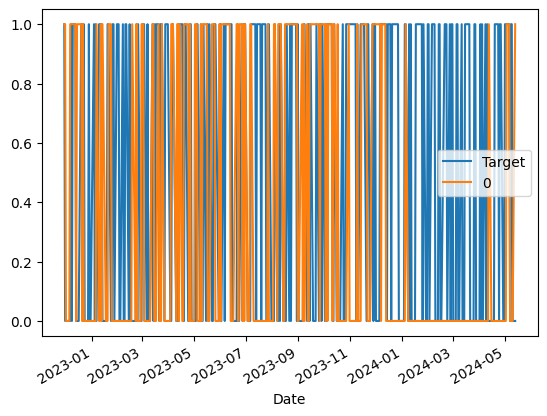

In [33]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

Model 2 (LTSM)

In [10]:
features_to_move = ["Target", "Tomorrow"]
columns_to_keep = [col for col in sp500_df.columns if col not in features_to_move]

# Reorder the columns
new_column_order = columns_to_keep + features_to_move
sp500_df = sp500_df[new_column_order]
sp500_df.head()
print(predictors)

['Close', 'Volume', 'Open', 'High', 'Low', 'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250', 'Close_Ratio_1000', 'Trend_1000']


In [15]:
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,...,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,Target,Tomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-23 00:00:00+00:00,1822.920044,1829.750000,1822.920044,1827.989990,1827.989990,2851540000,65.320224,1797.204168,1736.479197,1703.545171,...,1.010212,3.0,1.037942,33.0,1.116595,145.0,1.348619,557.0,1,1833.319946
2013-12-24 00:00:00+00:00,1828.020020,1833.319946,1828.020020,1833.319946,1833.319946,1307630000,66.772445,1800.643766,1738.396836,1705.264042,...,1.007332,4.0,1.039475,34.0,1.118715,146.0,1.351857,557.0,1,1842.020020
2013-12-26 00:00:00+00:00,1834.959961,1842.839966,1834.959961,1842.020020,1842.020020,1982270000,69.039816,1804.584361,1740.448780,1707.075380,...,1.008635,4.0,1.042959,34.0,1.122820,147.0,1.357566,557.0,0,1841.400024
2013-12-27 00:00:00+00:00,1842.969971,1844.890015,1839.810059,1841.400024,1841.400024,2052920000,68.681971,1808.090615,1742.447815,1708.854514,...,1.004796,4.0,1.041158,34.0,1.121306,146.0,1.356410,556.0,0,1841.069946
2013-12-30 00:00:00+00:00,1841.469971,1842.469971,1838.770020,1841.069946,1841.069946,2293860000,68.479506,1811.231504,1744.400728,1710.605712,...,1.002128,3.0,1.039381,34.0,1.120072,145.0,1.355472,555.0,1,1848.359985


In [16]:
sp500_df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,...,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,Target,Tomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-06 00:00:00+00:00,5357.799805,5362.350098,5335.359863,5352.959961,5352.959961,3609990000,64.868121,5271.384756,5080.607768,4966.995591,...,1.007740,4.0,1.031673,32.0,1.132893,140.0,1.274254,530.0,0,5346.990234
2024-06-07 00:00:00+00:00,5343.810059,5375.080078,5331.330078,5346.990234,5346.990234,3692760000,63.798380,5278.585278,5085.882669,4972.028632,...,1.003989,3.0,1.029921,32.0,1.130627,139.0,1.272156,530.0,1,5360.790039
2024-06-10 00:00:00+00:00,5341.220215,5365.790039,5331.520020,5360.790039,5360.790039,3622280000,65.218979,5286.414302,5091.326379,4977.177790,...,1.003664,3.0,1.031883,33.0,1.132566,139.0,1.274758,530.0,1,5375.319824
2024-06-11 00:00:00+00:00,5353.000000,5375.950195,5327.250000,5375.319824,5375.319824,3568030000,66.693406,5294.881495,5096.950011,4982.451194,...,1.003229,3.0,1.033823,34.0,1.134670,139.0,1.277522,531.0,1,5421.029785
2024-06-12 00:00:00+00:00,5409.129883,5447.250000,5409.129883,5421.029785,5421.029785,3962840000,70.857519,5306.895618,5103.367433,4988.260182,...,1.009236,3.0,1.041707,34.0,1.143307,139.0,1.287680,531.0,0,NaN


In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
sp500_df_scaled = sc.fit_transform(sp500_df)
#sp500_df_scaled["Target"] = sp500_df["Target"]
#sp500_df_scaled["Tomorrow"] = sp500_df["Tomorrow"]
print(sp500_df_scaled)
print("Shape of sp500_df_scaled:", sp500_df_scaled.shape)


[[0.02028067 0.01889684 0.02178873 ... 0.7        1.         0.02329241]
 [0.02158827 0.01980896 0.02309604 ... 0.7        1.         0.02550881]
 [0.02336762 0.02224134 0.02487501 ... 0.7        0.         0.02535087]
 ...
 [0.99089043 0.98578901 0.97021098 ... 0.18       0.         0.95867837]
 [0.97417622 0.97134048 0.96360514 ... 0.18       1.         0.97381352]
 [0.97447618 0.97462619 0.97180796 ... 0.18       0.                nan]]
Shape of sp500_df_scaled: (2661, 40)


In [11]:
sp500_df_scaled.shape[1]

31

In [14]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(sp500_df_scaled.shape[0])
for j in range(39):#data_set_scaled[0].size):#1 columns are target not X
    X.append([])
    for i in range(backcandles, sp500_df_scaled.shape[0]):#backcandles+2
        X[j].append(sp500_df_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(sp500_df_scaled[backcandles:,-2])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2661
[[[2.02806728e-02 1.88968397e-02 2.17887264e-02 ... 8.14906411e-01
   7.00000000e-01 1.00000000e+00]
  [2.15882684e-02 1.98089644e-02 2.30960437e-02 ... 8.20242819e-01
   7.00000000e-01 1.00000000e+00]
  [2.33676174e-02 2.22413384e-02 2.48750141e-02 ... 8.29654750e-01
   7.00000000e-01 0.00000000e+00]
  ...
  [9.96344059e-03 7.41972617e-03 4.46025543e-04 ... 6.80442396e-01
   6.40000000e-01 1.00000000e+00]
  [0.00000000e+00 7.51157801e-04 1.51236892e-03 ... 6.95361802e-01
   6.60000000e-01 0.00000000e+00]
  [2.45112745e-03 0.00000000e+00 0.00000000e+00 ... 6.90093410e-01
   6.40000000e-01 1.00000000e+00]]

 [[2.15882684e-02 1.98089644e-02 2.30960437e-02 ... 8.20242819e-01
   7.00000000e-01 1.00000000e+00]
  [2.33676174e-02 2.22413384e-02 2.48750141e-02 ... 8.29654750e-01
   7.00000000e-01 0.00000000e+00]
  [2.54213239e-02 2.27651278e-02 2.61182783e-02 ... 8.27748487e-01
   6.80000000e-01 0.00000000e+00]
  ...
  [0.00000000e+00 7.51157801e-04 1.51236892e-03 ... 6.95361802e-01
   6.

In [38]:
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,...,ADX_14,DMP_14,DMP_14,DMN_14,DMN_14,ADX,ADX_NEG,ADX_POS,Target,Tomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-12 00:00:00+00:00,2661.729980,2669.719971,2659.780029,2664.110107,2664.110107,3568910000,74.332530,2624.124590,2541.273263,2502.500975,...,27.468260,40.914004,40.914004,17.887283,17.887283,27.468260,40.914004,17.887283,0,2662.850098
2017-12-13 00:00:00+00:00,2667.590088,2671.879883,2662.850098,2662.850098,2662.850098,3568360000,73.471434,2627.812734,2543.680725,2504.624804,...,28.379449,40.201130,40.201130,17.136943,17.136943,28.379449,40.201130,17.136943,0,2652.010010
2017-12-14 00:00:00+00:00,2665.870117,2668.090088,2652.010010,2652.010010,2652.010010,3442760000,66.382975,2630.117236,2545.825859,2506.576926,...,28.360069,37.207873,37.207873,20.880360,20.880360,28.360069,37.207873,20.880360,1,2675.810059
2017-12-15 00:00:00+00:00,2660.629883,2679.629883,2659.139893,2675.810059,2675.810059,5736910000,72.601278,2634.468934,2548.399804,2508.818425,...,28.804924,37.761448,37.761448,18.352673,18.352673,28.804924,37.761448,18.352673,1,2690.159912
2017-12-18 00:00:00+00:00,2685.919922,2694.969971,2685.919922,2690.159912,2690.159912,3727770000,75.525794,2639.772836,2551.206935,2511.220299,...,29.751985,41.269795,41.269795,16.830581,16.830581,29.751985,41.269795,16.830581,0,2681.469971


In [15]:
sp500_df_scaled.shape

(2661, 40)

In [16]:
# Generate a date range
dates = pd.date_range(start='2017-12-12', periods=sp500_df_scaled.shape[0], freq='B')  # adjust start date and frequency as needed

# Convert the date range to a numpy array
dates = dates.to_numpy()

# Now you have a separate numpy array for the dates
# You can use it together with your X and y when splitting your data into training and testing sets

# Define your train-test split date
split_date = np.datetime64('2025-01-01')  # replace with your date

# Get the indices for the train and test sets
train_indices = np.where(dates <= split_date)[0]
test_indices = np.where(dates >= split_date)[0]

# Ensure that test_indices does not exceed the size of X
train_indices = train_indices[train_indices < len(X)]
test_indices = test_indices[test_indices < len(X)]

# Split the data into train and test sets based on the indices
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)


(1842, 30, 39)
(790, 30, 39)
(1842, 1)
(790, 1)
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [17]:
print(f"Split date: {split_date}")
print(f"Min date: {dates.min()}")
print(f"Max date: {dates.max()}")

Split date: 2025-01-01
Min date: 2017-12-12T00:00:00.000000000
Max date: 2028-02-22T00:00:00.000000000


In [22]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2083
(2083, 30, 26)
(521, 30, 26)
(2083, 1)
(521, 1)
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]


In [66]:
# Function to create model, required for KerasClassifier
def create_model(lstm_input=50, dense_units=1, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(lstm_input, input_shape=(X_train.shape[1], 29)))
    model.add(Dense(dense_units))
    model.add(Activation('softmax'))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [67]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, TimeDistributed, Input, Activation
from keras.models import Model
from keras import optimizers
from keras.callbacks import History
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

tf.random.set_seed(42)
np.random.seed(42)

# Create a KerasClassifier with the model
model = KerasClassifier(model=create_model, lstm_input=100, dense_units=1, optimizer='adam', verbose=0) 

model.get_params().keys()

# Define the grid search parameters
param_grid = {
    'lstm_input': [100, 150, 200],
    'dense_units': [1],
    'optimizer': ['adam'],
    'batch_size': [10, 20, 30],
    'epochs': [10, 20, 30],
    'validation_split': [.001, 0.1, 0.3]
}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

c:\Users\wtshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\wtshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\wtshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Best: 0.534497 using {'batch_size': 10, 'dense_units': 1, 'epochs': 10, 'lstm_input': 100, 'optimizer': 'adam', 'validation_split': 0.001}


In [16]:
X = X_train.reshape(X_train.shape[0], X_train.shape[1], 29)
X_reshaped = X.reshape(X.shape[0], -1)
y = y_train.reshape(y.shape[0], 1)

In [37]:
print(X_reshaped.shape)
print(y.shape)

(2603, 870)
(2603, 1)


In [17]:
from sklearn.decomposition import PCA

# Assuming X is your features and y is your target
pca = PCA(n_components=10)  # Choose the number of components
X_pca = pca.fit_transform(X_reshaped)

In [18]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Initialize with some parameters
svr.fit(X_pca, y)

c:\Users\wtshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [22]:
from pyswarm import pso
from sklearn.metrics import mean_squared_error
import numpy as np

def svr_error(params):
    C, epsilon = params
    svr = SVR(kernel='rbf', C=C, epsilon=epsilon)
    svr.fit(X_pca, np.ravel(y))  # Reshape y to a 1D array
    y_pred = svr.predict(X_pca)
    error = mean_squared_error(np.ravel(y), y_pred)  # Reshape y to a 1D array here as well
    return error

lb = [0.1, 0.01]  # Lower bounds for C and epsilon
ub = [10, 1]  # Upper bounds for C and epsilon

xopt, fopt = pso(svr_error, lb, ub)

Stopping search: maximum iterations reached --> 100


In [35]:
from sklearn.svm import SVR

X_test2 = X_test.reshape(X_test.shape[0], X_test.shape[1], 29)
X_test_reshaped = X_test2.reshape(X_test2.shape[0], -1)
y_test_reshaped = y_test.reshape(y_test.shape[0], 1)

# Extract the optimal parameters
C_opt, epsilon_opt = xopt

# Create and fit the SVR model with the optimal parameters
svr_opt = SVR(kernel='rbf', C=C_opt, epsilon=epsilon_opt)
svr_opt.fit(X_reshaped, np.ravel(y))  # Replace X_train and y_train with your training data

# Predict y_test
y_test_pred = svr_opt.predict(X_test_reshaped)

In [41]:
print(y_test_reshaped.shape)
print(X_test_reshaped.shape)
print(X_train.shape)
print(y_test_pred.shape)

(1284, 1)
(2603, 870)
(1319, 30, 29)
(2603,)


In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score

fpr, tpr, thresholds = roc_curve(y_test_reshaped, y_test_pred)

# Youden's J statistic
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)
preds = (y_test_pred > optimal_threshold).astype(int)
preds = preds.flatten()
print(preds)
y_test_binary = (y_test > optimal_threshold).astype(int)
precision_score(y_test_binary, preds)

ValueError: Found input variables with inconsistent numbers of samples: [1284, 2603]

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

def create_lstm_model(params):
    # Create and compile your LSTM model based on the parameters
    model = Sequential()
    model.add(LSTM(100, input_shape=(None, 1)))  # params[0] could be the number of units in the LSTM layer
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def lstm_error(params):
    model = create_lstm_model(params)
    model.fit(X_pca, np.ravel(y), epochs=10, batch_size=10, verbose=0, validation_split = 0.1 )  # Adjust epochs, batch_size, verbose as needed
    y_pred = model.predict(X_pca)
    error = mean_squared_error(np.ravel(y), y_pred)
    return error

lb = [1]  # Lower bounds for LSTM parameters
ub = [100]  # Upper bounds for LSTM parameters

xopt, fopt = pso(lstm_error, lb, ub)

NameError: name 'pso' is not defined

In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, TimeDistributed, Input, Activation
from keras.models import Model
from keras import optimizers
from keras.callbacks import History
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

lstm_input = Input(shape=(backcandles, 39), name='lstm_input')
inputs = LSTM(100, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=10, epochs=10, shuffle=True, validation_split = 0.001)

Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2646 - val_loss: 0.2224
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2550 - val_loss: 0.2231
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2501 - val_loss: 0.2197
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2490 - val_loss: 0.2179
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2484 - val_loss: 0.2168
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2480 - val_loss: 0.2159
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2477 - val_loss: 0.2150
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2475 - val_loss: 0.2141
Epoch 9/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2473 - val_loss: 0.2132
Epoch 10/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2472 - val_loss: 0.2124


In [20]:
if len(X_test) > 0:
    y_pred = model.predict(X_test)
    if len(y_pred) > 0:
        # Continue with the rest of the code
        ...
    else:
        print("Model did not return any predictions.")
else:
    print("X_test is empty.")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score

y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Youden's J statistic
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)
preds = (y_pred > optimal_threshold).astype(int)
preds = preds.flatten()
print(preds)
y_test_binary = (y_test > optimal_threshold).astype(int)
precision_score(y_test_binary, preds)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Optimal Threshold: 0.47236976
[1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0
 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0
 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 

0.5355648535564853

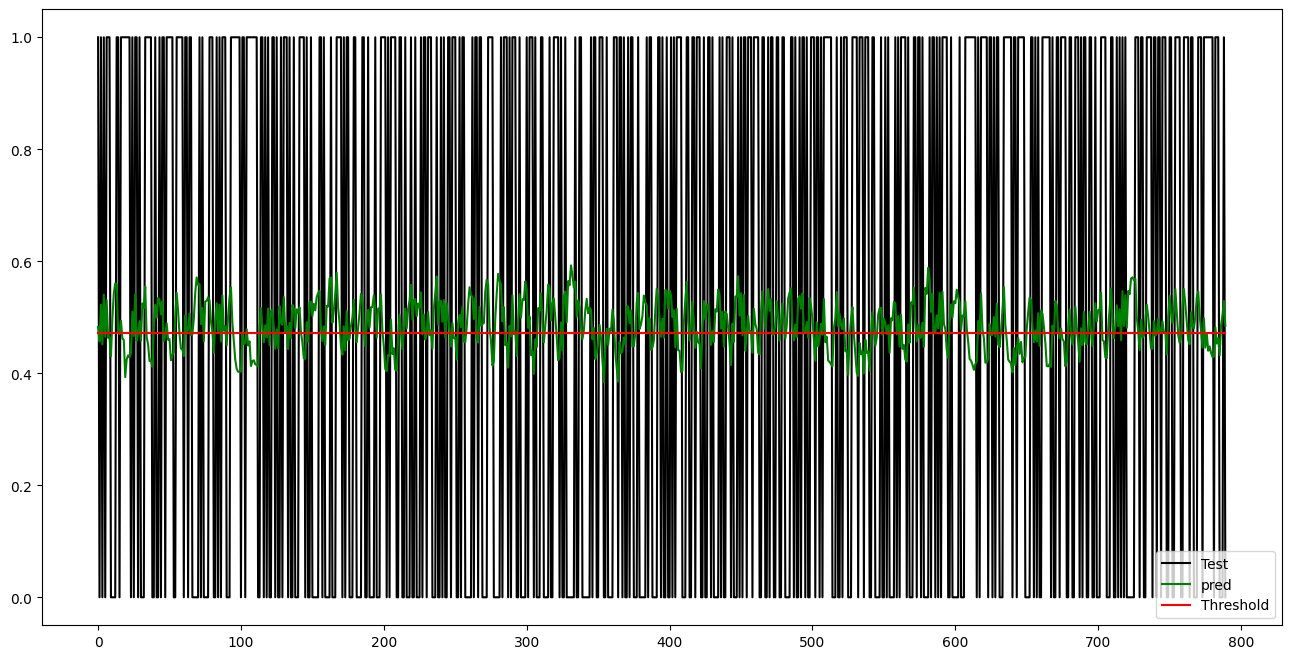

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.plot(optimal_threshold*np.ones(len(y_test)), color = 'red', label = 'Threshold')
plt.legend()
plt.show()

In [23]:
# Create a copy of the original S&P 500 DataFrame with correct index
sp500_df_correct_index = sp500_df.copy()
sp500_df_scaled = pd.DataFrame(sp500_df_scaled, index=sp500_df.index)

# Add a new column to store the increase in correct guesses
total_increase = 0
total_decrease = 0
guesses = 0
total_up = 0
total_down = 0
total_up_guesses = 0
total_down_guesses = 0
total_up_2 = 0
total_down_2 = 0
price_increase = 0
price_decrease = 0
start_price = 0
end_price = 0

for i in range(1, len(preds)-1):
    # Check if the prediction was 1
    if preds[i-1] == 1:  # use i-1 if preds is aligned with sp500_df_correct_index starting from index 1
        # Calculate the increase in correct guesses
        increase = (sp500_df_correct_index['Close'].iloc[i] - sp500_df_correct_index['Close'].iloc[i-1])
        price_increase += increase
        percent_increase = (increase / sp500_df_correct_index['Close'].iloc[i-1]) * 100
        guesses = guesses + 1
        if percent_increase > 0:
            total_up += percent_increase  
            total_up_guesses += 1
        else:
            total_down += percent_increase
        total_increase += percent_increase

for i in range(1, len(preds)-1):
    if i == 1:
        start_price = sp500_df_correct_index['Close'].iloc[i-1]
        print("Start Price:", start_price)
    if i == len(preds)-2:
        end_price = sp500_df_correct_index['Close'].iloc[i]
        print("End Price:", end_price)
    # Check if the prediction was 1
    if preds[i-1] == 0:  # use i-1 if preds is aligned with sp500_df_correct_index starting from index 1
        # Calculate the increase in correct guesses
        decrease = (sp500_df_correct_index['Close'].iloc[i] - sp500_df_correct_index['Close'].iloc[i-1])
        price_decrease += decrease 
        percent_decrease = (decrease / sp500_df_correct_index['Close'].iloc[i-1]) * 100
        if percent_decrease > 0:
            total_up_2 += percent_decrease  
            total_down_guesses += 1
        else:
            total_down_2 += percent_decrease
        total_decrease += percent_decrease

# Print the total increase
print()
print("Total Invest Guesses", guesses)
print("Total Up", total_up, total_up_guesses)
print("Total Down", total_down, guesses - total_up_guesses)
print("Total Change in Invest Guesses:", total_increase)
print("Total Price Increase:", price_increase)
print()
print("Total Don't Invest Guesses", len(preds) - guesses)
print("total up", total_up_2, total_down_guesses)
print("total down", total_down_2, len(preds) - guesses - total_down_guesses)
print("Total Change in Don't Invest Guesses:", total_decrease)
print("Total Price Decrease:", price_decrease)
print()
snp500_increase = (end_price - start_price)
snp500_total_increase = (snp500_increase / end_price) * 100
print("Total Percent Change in Invest Guesses:", total_up + total_down)
print("Total Percent Change in SNP500:", snp500_total_increase)
print()
print("Total $ Change in Invest Guesses:", price_increase)
print("Total $ Change in SNP500:", snp500_increase)




Start Price: 1827.989990234375
End Price: 2307.8701171875

Total Invest Guesses 476
Total Up 154.41295541723855 253
Total Down -132.0083767606989 223
Total Change in Invest Guesses: 22.40457865653966
Total Price Increase: 413.83251953125

Total Don't Invest Guesses 314
total up 92.94663478134322 159
total down -89.31536892903458 155
Total Change in Don't Invest Guesses: 3.6312658523086143
Total Price Decrease: 66.047607421875

Total Percent Change in Invest Guesses: 22.404578656539655
Total Percent Change in SNP500: 20.79320336873783

Total $ Change in Invest Guesses: 413.83251953125
Total $ Change in SNP500: 479.880126953125


Feature Importances

In [25]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0, scoring='accuracy')
print(result.importances_mean)

ValueError: Found array with dim 3. None expected <= 2.

In [26]:
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(model, X_train, features=[0, 1, (0, 1)])

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (c:\Users\wtshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\inspection\__init__.py)

In [24]:
print(model.input_shape)
X_test[0].shape

(None, 30, 39)


(30, 39)

In [25]:
import shap
import numpy as np
import tensorflow as tf

# Assuming X_train, X_test, and model are defined elsewhere in your code

# Ensure that X_train and X_test have the same number of features
assert X_train.shape[1] == X_test.shape[1], "X_train and X_test have different number of features"

# Create a background dataset (can be a small representative sample of your input data)
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# Reshape the background data to 2D for SHAP, but keep original shape for model prediction
background_2d = background.reshape(background.shape[0], -1)
background_3d = background.reshape(background.shape[0], 30, 39)

# Check that the background data has the same number of features as the sample data
sample = X_test[0].reshape(1, -1)
sample_3d = X_test[0].reshape(1, 30, 39)
assert background_2d.shape[1] == sample.shape[1], "Background data and sample data have different number of features"

def model_predict(data_asarray):
    # Reshape the data to the expected shape
    data_asarray = data_asarray.reshape(-1, 30, 39)
    print(f"Data shape: {data_asarray.shape}")  # Add this line
    predictions = model.predict(data_asarray)
    if isinstance(predictions, tf.Tensor):
        predictions = predictions.numpy()
    if predictions.ndim == 1:
        predictions = predictions.reshape(-1, 1)
    return predictions

# Create the explainer
explainer = shap.KernelExplainer(model_predict, background_2d)

# Calculate SHAP values for a new sample
shap_values = explainer.shap_values(sample)

# Plot the SHAP values
# Assuming X_train is your numpy array
feature_names = ["feature_" + str(i) for i in range(X_train.shape[1])]
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0].reshape(-1), sample.reshape(-1), feature_names=feature_names)

Data shape: (100, 30, 39)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\wtshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/1 [00:00<?, ?it/s]

Data shape: (1, 30, 39)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Data shape: (438800, 30, 39)
13713/13713 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step


100%|██████████| 1/1 [00:42<00:00, 42.56s/it]


In [26]:
# Import necessary libraries
import shap
import numpy as np
import tensorflow as tf

# Assuming X_train, X_test, and model are defined elsewhere in your code

# Ensure that X_train and X_test have the same number of features
assert X_train.shape[1] == X_test.shape[1], "X_train and X_test have different number of features"

# Create a background dataset (can be a small representative sample of your input data)
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# Reshape the background data to 2D for SHAP, but keep original shape for model prediction
background_2d = background.reshape(background.shape[0], -1)
background_3d = background.reshape(background.shape[0], 30, 39)

# Check that the background data has the same number of features as the sample data
sample = X_test[0].reshape(1, -1)
sample_3d = X_test[0].reshape(1, 30, 39)
assert background_2d.shape[1] == sample.shape[1], "Background data and sample data have different number of features"

def model_predict(data_asarray):
    # Reshape the data to the expected shape
    data_asarray = data_asarray.reshape(-1, 30, 39)
    print(f"Data shape: {data_asarray.shape}")  # Add this line
    predictions = model.predict(data_asarray)
    if isinstance(predictions, tf.Tensor):
        predictions = predictions.numpy()
    if predictions.ndim == 1:
        predictions = predictions.reshape(-1, 1)
    return predictions

# Create the explainer
explainer = shap.KernelExplainer(model_predict, background_2d)

# Calculate SHAP values for a new sample
shap_values = explainer.shap_values(sample)

# Assuming X_train is your numpy array
feature_names = ["feature_" + str(i) for i in range(X_train.shape[1])]

# Convert SHAP values to a more readable format
shap_values_readable = list(zip(feature_names, shap_values[0].reshape(-1)))

# Sort features by their SHAP values
shap_values_sorted = sorted(shap_values_readable, key=lambda x: abs(x[1]), reverse=True)

# Print sorted features and their SHAP values
for feature, value in shap_values_sorted:
    print(f"{feature}: {value}")

Data shape: (100, 30, 39)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


  0%|          | 0/1 [00:00<?, ?it/s]

Data shape: (1, 30, 39)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Data shape: (438800, 30, 39)
13713/13713 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step


100%|██████████| 1/1 [00:42<00:00, 42.83s/it]

feature_23: -4.370120263352126e-05
feature_2: -3.3797478011230135e-05
feature_29: -3.085497048596582e-05
feature_27: 1.4322889428497147e-05
feature_20: 8.539638259601188e-06
feature_9: -2.3850351747872036e-06
feature_15: 5.784452936486051e-07
feature_0: 0.0
feature_1: 0.0
feature_3: 0.0
feature_4: 0.0
feature_5: 0.0
feature_6: 0.0
feature_7: 0.0
feature_8: 0.0
feature_10: 0.0
feature_11: 0.0
feature_12: 0.0
feature_13: 0.0
feature_14: 0.0
feature_16: 0.0
feature_17: 0.0
feature_18: 0.0
feature_19: 0.0
feature_21: 0.0
feature_22: 0.0
feature_24: 0.0
feature_25: 0.0
feature_26: 0.0
feature_28: 0.0
